## Image Processing with OpenCV 



In [1]:
# Import everything
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

### 1. Scaling an Image

Scaling operatin increases/reduces size of an image

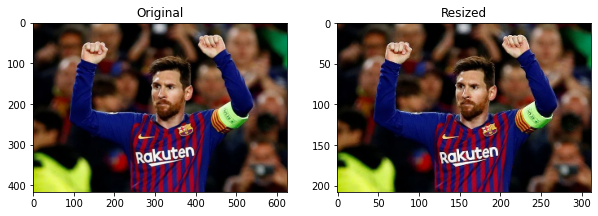

In [2]:
FILE_NAME = '../images/messi.jpg'
try:
    # Read image from disk.
    img = cv.imread(FILE_NAME)
  
    # Get number of pixel horizontally and vertically.
    (height, width) = img.shape[:2]
  
    # Specify the size of image along with interploation methods.
    # cv.INTER_AREA is used for shrinking, whereas cv.INTER_CUBIC
    # is used for zooming.
    res = cv.resize(img, (int(width / 2), int(height / 2)), interpolation = cv.INTER_CUBIC)
  
    # Write image back to disk.
    # cv.imwrite('result.jpg', res)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    ax1.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    ax1.set(title='Original');
    ax2.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
    ax2.set(title='Resized');

  
except IOError:
    print ('Error while reading files !!!')

***

### 2. Rotating an image

Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor.

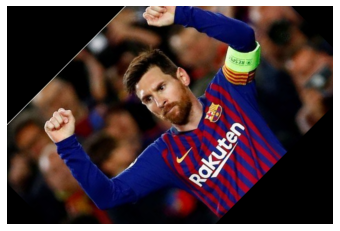

In [3]:
FILE_NAME = '../images/messi.jpg'
try:
    # Read image from the disk.
    img = cv.imread(FILE_NAME)
  
    # Shape of image in terms of pixels.
    (rows, cols) = img.shape[:2]
  
    # getRotationMatrix2D creates a matrix needed for transformation.
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    res = cv.warpAffine(img, M, (cols, rows))
  
    # Write image back to disk.
    # cv.imwrite('result.jpg', res)
    plt.axis('off')
    plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB));
except IOError:
    print ('Error while reading files !!!')

***

### 3. Translating an Image

Translating an image means shifting it within a given frame of reference.

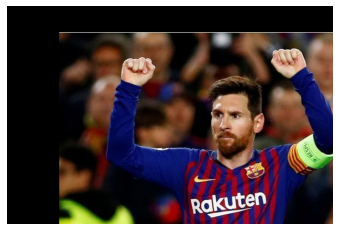

In [4]:
# Create translation matrix.
# If the shift is (x, y) then matrix would be
# M = [1 0 x]
#     [0 1 y]
# Let's shift by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])
  
try:
  
    # Read image from disk.
    img = cv.imread(FILE_NAME)
    (rows, cols) = img.shape[:2]
  
    # warpAffine does appropriate shifting given the
    # translation matrix.
    res = cv.warpAffine(img, M, (cols, rows))
  
    # Write image back to disk.
    # cv.imwrite('result.jpg', res)
    plt.axis('off')
    plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB));
  
except IOError:
    print ('Error while reading files !!!')

***

### 4. Edge Detection in an Image

The process of image detection involves detecting sharp edges in the image. This edge detection is essential in context of image recognition or [object localization/detection](https://en.wikipedia.org/wiki/Object_detection). There are several algorithms for detecting edges due to it’s wide applicability. We’ll be using one such algorithm known as [Canny Edge Detection](https://en.wikipedia.org/wiki/Canny_edge_detector).

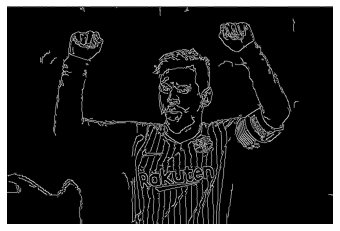

In [5]:
try:
    # Read image from disk.
    img = cv.imread(FILE_NAME)
  
    # Canny edge detection.
    edges = cv.Canny(img, 100, 200)
  
    # Write image back to disk.
    # cv.imwrite('result.jpg', edges)

    plt.axis('off')
    plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB));
except IOError:
    print ('Error while reading files !!!')

***

## Image Blurring with OpenCV

**Image Blurring** refers to making the image less clear or distinct. It is done with the help of various low pass filter kernels.  

**Advantages of blurring:**   
* It helps in Noise removal. As noise is considered as high pass signal so by the application of low pass filter kernel we restrict noise.
* It helps in smoothing the image.
* Low intensity edges are removed.
* It helps in hiding the details when necessary. For e.g. in many cases police deliberately want to hide the face of the victim, in such cases blurring is required.

**Important types of Blurring:**
* **Gaussian Blurring**: Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models.
E.g. of a Gaussian kernel(3×3)
* **Median Blur**: The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise. It is one of the best algorithms to remove Salt and pepper noise.
* **Bilateral Blur**: A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.



In [6]:
# Press Q to display all the blurred image and close their windows.

image = cv.imread(FILE_NAME)
  
cv.imshow('Original Image', image)
cv.waitKey(0)
  
# Gaussian Blur
Gaussian = cv.GaussianBlur(image, (7, 7), 0)
cv.imshow('Gaussian Blurring', Gaussian)
cv.waitKey(0)
  
# Median Blur
median = cv.medianBlur(image, 5)
cv.imshow('Median Blurring', median)
cv.waitKey(0)
  
  
# Bilateral Blur
bilateral = cv.bilateralFilter(image, 9, 75, 75)
cv.imshow('Bilateral Blurring', bilateral)
cv.waitKey(0)
cv.destroyAllWindows()

## Erosion and Dilation of images using OpenCV
**Morphological operations** are set of operations that process images based on shapes. They apply a structuring element to an input image and generate an output image.

The most basic morphological operationsare two are **Erosion** & **Dilation**.

**Basics of Erison**:
* Erodes away the boundaries of the foreground object.
* Used to diminish the features of an image.

**Working of Erison**:
1. A kernel(a matrix of odd size(3,5,7) is convolved with the image.
2. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel are 1, otherwise, it is eroded (made to zero).
3. Thus all the pixels near the boundary will be discarded depending upon the size of the kernel.
4. So the thickness or size of the foreground object decreases or simply the white region decreases in the image.

**Basics of Dilation**:
* Increases the object area
* Used to accentuate features

**Working of Dilation**:
1. A kernel(a matrix of odd size(3,5,7) is convolved with the image.
2. A pixel element in the original image is ‘1’ if at least one pixel under the kernel is ‘1’.
3. It increases the white region in the image or the size of the foreground object increases 



In [7]:
# Reading the input image
img = cv.imread('../images/messi.jpg', 0)
 
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv.erode(img, kernel, iterations=1)
img_dilation = cv.dilate(img, kernel, iterations=1)
 
# cv.imshow('Input', img)
# cv.imshow('Erosion', img_erosion)
# cv.imshow('Dilation', img_dilation)
 
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax1.imshow(img)
ax1.set(title='Original');

ax2.imshow(img_erosion)
ax2.set(title='')